<a href="https://colab.research.google.com/github/sergiogarciag/hado/blob/main/cargadatosmunicipios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#config
MUNICIPIO='24089'
PROVINCIA='24'

In [20]:
import pandas as pd

In [21]:
with open('/content/drive/My Drive/UNIRTFM/data/pernoctaciones/'+MUNICIPIO+'.csv', 'r') as f:
  dfPernoctas = pd.read_csv(f, sep='|' , header=0, names=['date','origen', 'destino','pernoctas'])


In [22]:
dfPernoctasLeon.head()

,origen,destino,pernoctas,fecha
0,01009_AM,24089,3.000,2022-01-01
1,01010,24089,1.401,2022-01-01
2,01017_AM,24089,3.130,2022-01-01
3,01028_AM,24089,7.296,2022-01-01
4,01036,24089,6.767,2022-01-01


In [23]:
dfPernoctas['fecha'] = pd.to_datetime(dfPernoctas['date'], format='%Y%m%d', errors='coerce')

In [24]:
dfPernoctas = dfPernoctas.drop('date', axis=1)

In [25]:
dfPernoctasLeon.head()

,origen,destino,pernoctas,fecha
0,01009_AM,24089,3.000,2022-01-01
1,01010,24089,1.401,2022-01-01
2,01017_AM,24089,3.130,2022-01-01
3,01028_AM,24089,7.296,2022-01-01
4,01036,24089,6.767,2022-01-01


In [26]:
dfPernoctas = dfPernoctas[~dfPernoctas['origen'].astype(str).str.startswith(PROVINCIA)]


In [27]:
dfPernoctas_grouped = dfPernoctas.groupby(['fecha','destino'])['pernoctas'].sum().reset_index()
dfPernoctas_grouped[dfPernoctas_grouped['destino'] ==MUNICIPIO]

,fecha,destino,pernoctas
0,2022-01-01,24089,12574.186
1,2022-01-02,24089,12092.755
2,2022-01-03,24089,8725.976
3,2022-01-04,24089,8103.817
4,2022-01-05,24089,7756.486
...,...,...,...
921,2024-06-26,24089,6346.101
922,2024-06-27,24089,6246.776
923,2024-06-28,24089,6821.965
924,2024-06-29,24089,10361.256


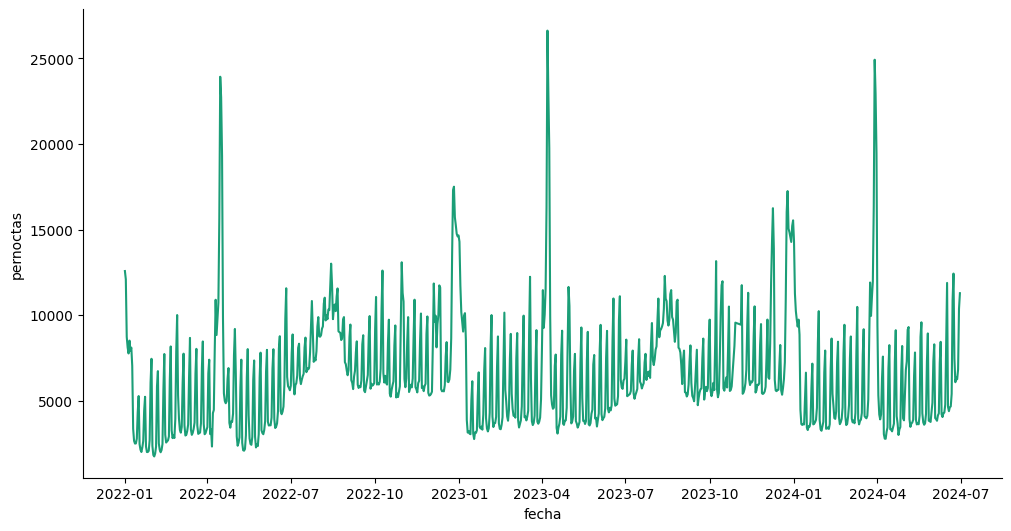

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fecha']
  ys = series['pernoctas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dfPernoctas_grouped[dfPernoctas_grouped['destino'] ==MUNICIPIO].sort_values('fecha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fecha')
_ = plt.ylabel('pernoctas')

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
ADF_result = adfuller(dfPernoctasLeon_grouped[dfPernoctasLeon_grouped['destino'] =='24089']['pernoctas'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.549438173389252
p-value: 1.6324660286605805e-06
